# Lab #2

### NOTE. For this lab you need subsample with 5-10 random variables, at least half ofthem should be described with continuous random variable type. Target variableshould be continuous.

In [63]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoLarsIC
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

---
### Step 0 - Data preparation.

### The data is taken from the database: https://www.kaggle.com/rustydigg918/exploratory-data-analysis-on-car-sales-data/data

In [154]:
sales_df = pd.read_csv('Car_Sales.csv')
sales_df = sales_df.drop(sales_df.columns[0], axis = 1)
sales_df.head(10)

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Country,Tax_type
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,Japan,2.0
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,Japan,5.0
2,Acura,CL,14.114,18.225,Passenger,30.60,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,91.361224,Japan,5.0
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,Japan,5.0
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,Germany,2.0
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,Germany,4.0
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858,Germany,7.0
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207,Germany,3.0
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069,Germany,4.0
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724,Germany,4.0


In [155]:
for i in range(len(sales_df.columns)):
    print(sales_df.columns[i], 'unique values: ', len(sales_df[sales_df.columns[i]].unique()), '\n') 

Manufacturer unique values:  30 

Model unique values:  155 

Sales_in_thousands unique values:  156 

Year_resale_value unique values:  117 

Vehicle_type unique values:  2 

Price_in_thousands unique values:  153 

Engine_size unique values:  31 

Horsepower unique values:  66 

Wheelbase unique values:  88 

Width unique values:  78 

Length unique values:  127 

Curb_weight unique values:  148 

Fuel_capacity unique values:  55 

Fuel_efficiency unique values:  20 

Latest_Launch unique values:  129 

Power_perf_factor unique values:  155 

Country unique values:  6 

Tax_type unique values:  8 



In [256]:
x_data = sales_df[['Manufacturer', 'Sales_in_thousands', 'Engine_size',
                   'Horsepower', 'Curb_weight', 'Fuel_capacity', 'Power_perf_factor']]

target = sales_df['Price_in_thousands']
x_cols = x_data.columns

---
### Step 1 - You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV) .

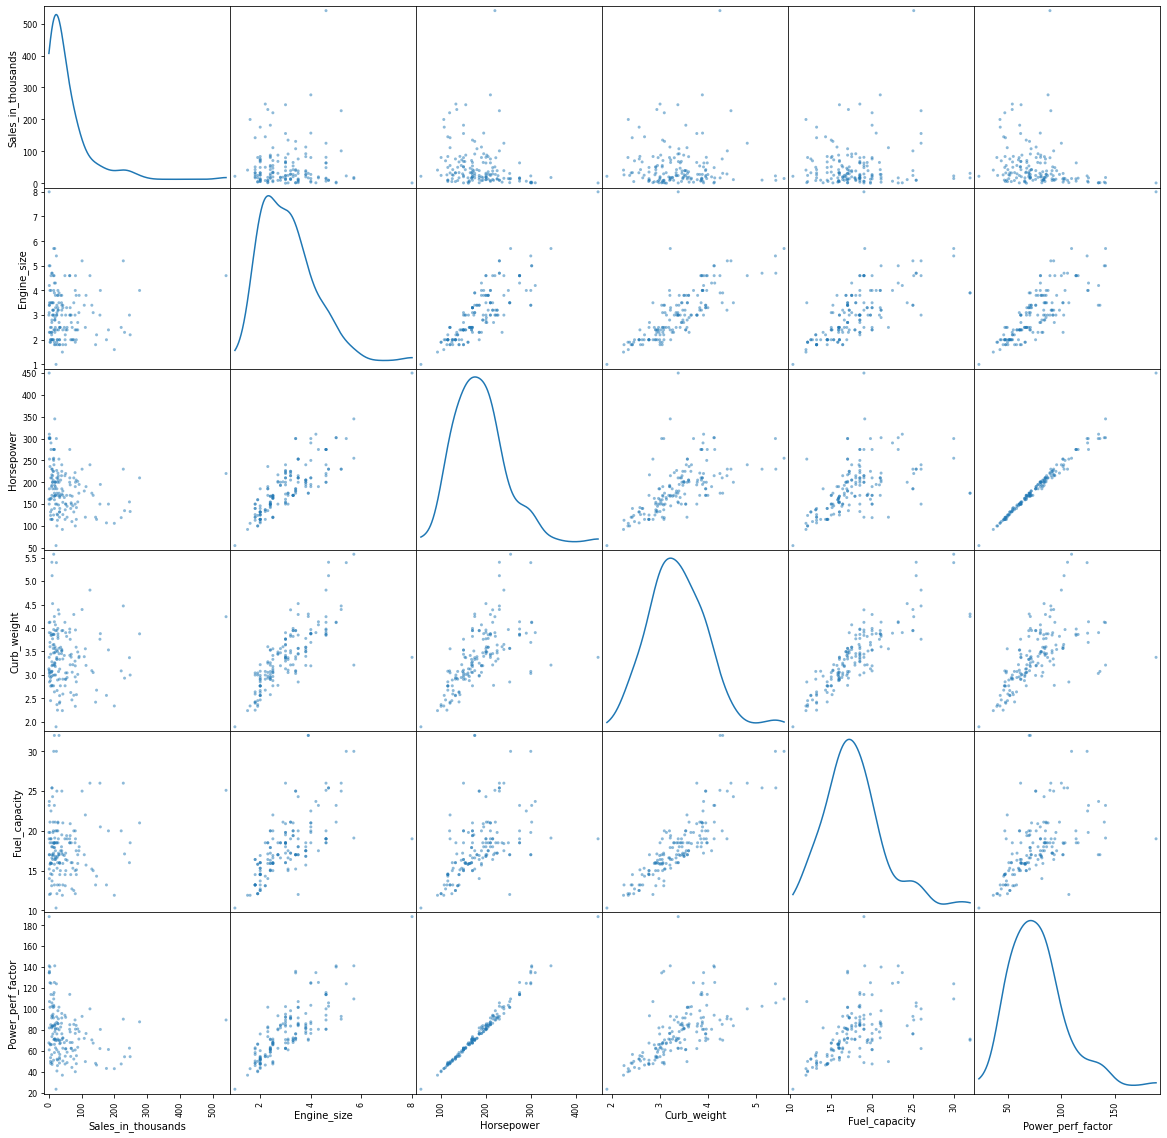

In [257]:
pd.plotting.scatter_matrix(x_data,  diagonal = 'kde', figsize = (20,20))
plt.show()

<Figure size 1440x1440 with 0 Axes>

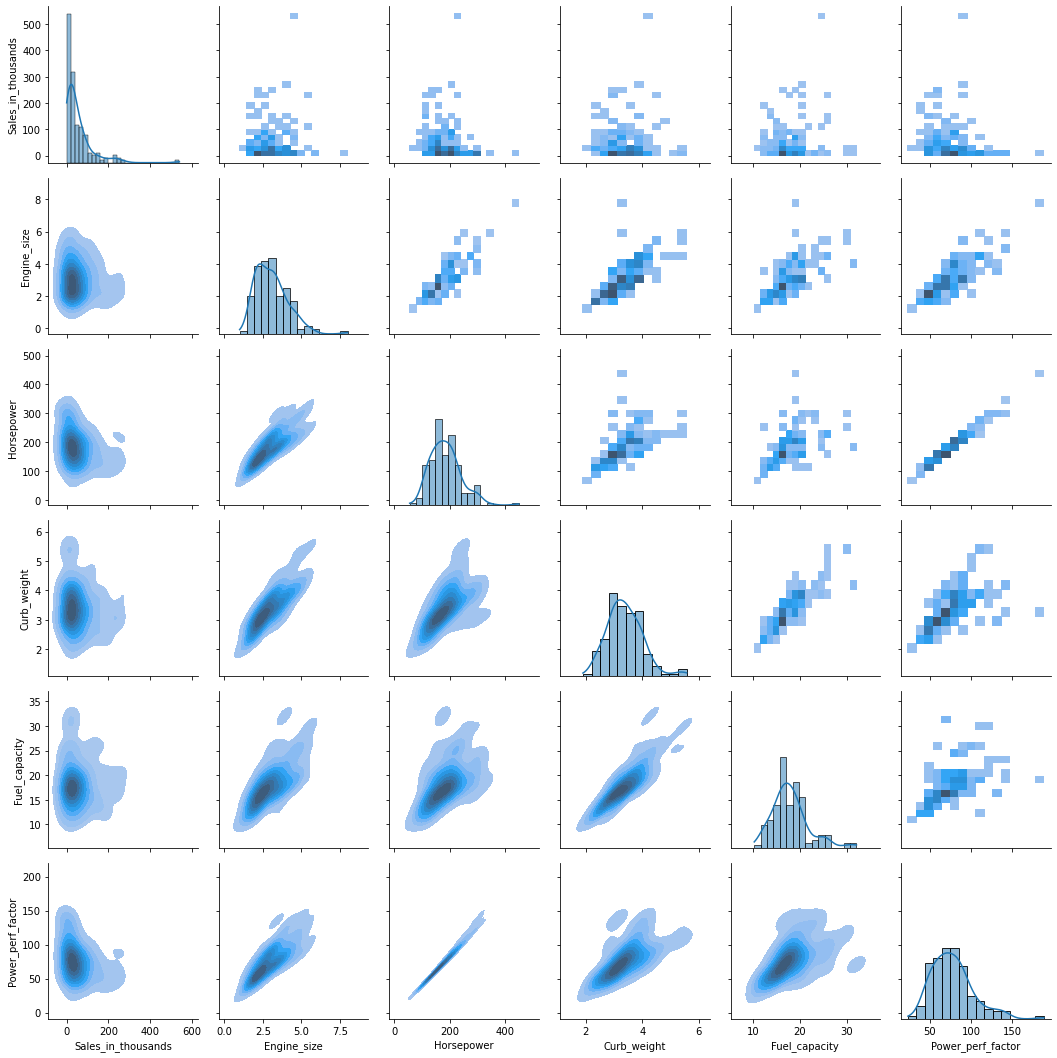

In [259]:
fig = plt.figure(figsize = (20, 20))
g = sns.PairGrid(x_data[x_cols[1:]], vars = x_cols[1:])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill = True)
g.map_diag(sns.histplot, kde = True)

---
### Step 2 - You need to make an estimation of multivariate mathematical expectation and variance.

In [260]:
x_data[x_data.columns].mean()

Sales_in_thousands     52.994987
Engine_size             3.060897
Horsepower            185.948718
Curb_weight             3.381135
Fuel_capacity          17.951923
Power_perf_factor      77.135371
dtype: float64

In [261]:
x_data[x_data.columns].cov()

,Sales_in_thousands,Engine_size,Horsepower,Curb_weight,Fuel_capacity,Power_perf_factor
Sales_in_thousands,4657.858828,1.424722,-765.259781,0.253787,22.962847,-385.040919
Engine_size,1.424722,1.091300,49.598627,0.500276,2.692882,21.441075
Horsepower,-765.259781,49.598627,3214.926385,21.845323,110.202680,1412.468698
Curb_weight,0.253787,0.500276,21.845323,0.396475,2.112616,9.694201
Fuel_capacity,22.962847,2.692882,110.202680,2.112616,15.115932,48.758367
Power_perf_factor,-385.040919,21.441075,1412.468698,9.694201,48.758367,629.389216


---
### Step 3 - You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

In [263]:
x_data[x_cols[0]].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [264]:
x_data.loc[x_data[x_cols[0]] == 'Acura', x_cols].mean()

Sales_in_thousands     19.751250
Engine_size             2.925000
Horsepower            200.000000
Curb_weight             3.369000
Fuel_capacity          16.400000
Power_perf_factor      83.100483
dtype: float64

In [265]:
x_data.loc[x_data[x_cols[0]] == 'Acura', x_cols].cov()

,Sales_in_thousands,Engine_size,Horsepower,Curb_weight,Fuel_capacity,Power_perf_factor
Sales_in_thousands,183.287750,0.205392,136.063333,-0.321899,0.799467,31.187556
Engine_size,0.205392,0.582500,29.000000,0.388767,1.653333,12.411752
Horsepower,136.063333,29.000000,1650.000000,18.278333,82.666667,661.796288
Curb_weight,-0.321899,0.388767,18.278333,0.265455,1.101600,8.054778
Fuel_capacity,0.799467,1.653333,82.666667,1.101600,4.693333,35.304257
Power_perf_factor,31.187556,12.411752,661.796288,8.054778,35.304257,273.799668


In [266]:
x_data.loc[x_data[x_cols[0]] == 'BMW', x_cols].mean()

Sales_in_thousands     15.501667
Engine_size             2.700000
Horsepower            185.333333
Curb_weight             3.282667
Fuel_capacity          17.233333
Power_perf_factor      79.022333
dtype: float64

In [267]:
x_data.loc[x_data[x_cols[0]] == 'BMW', x_cols].cov()

,Sales_in_thousands,Engine_size,Horsepower,Curb_weight,Fuel_capacity,Power_perf_factor
Sales_in_thousands,30.723045,-0.636800,-48.821333,0.240275,1.924067,-20.533993
Engine_size,-0.636800,0.030000,2.300000,0.015550,0.095000,1.174669
Horsepower,-48.821333,2.300000,176.333333,1.192167,7.283333,90.057953
Curb_weight,0.240275,0.015550,1.192167,0.026966,0.179867,0.754734
Fuel_capacity,1.924067,0.095000,7.283333,0.179867,1.203333,4.727571
Power_perf_factor,-20.533993,1.174669,90.057953,0.754734,4.727571,47.120260


---
### Step 4 - You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [268]:
def get_corr(x, y):
    
    r, p = stats.pearsonr(x, y)
    r_z = np.arctanh(r)
    se = 1 / np.sqrt(x.size - 3)
    alpha = 0.05
    
    z = stats.norm.ppf(1 - alpha / 2)
    low_z, high_z = r_z - z * se, r_z + z * se
    low, high = np.tanh((low_z, high_z))
    
    return '{} ({} - {})'.format(round(r, 4), round(low, 4), round(high, 4))

In [269]:
x_data.pop(x_cols[0])
x_cols = x_data.columns

cors = pd.DataFrame(columns = x_data.columns, index = x_data.columns)

for i in x_cols:
      for j in x_cols:
            cors.loc[i, j] = get_corr(x_data[i], x_data[j])
cors

<ipython-input-268-0a3614283458>:4: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)


,Sales_in_thousands,Engine_size,Horsepower,Curb_weight,Fuel_capacity,Power_perf_factor
Sales_in_thousands,1.0 (1.0 - 1.0),0.02 (-0.1376 - 0.1766),-0.1978 (-0.3442 - -0.0419),0.0059 (-0.1514 - 0.1629),0.0865 (-0.0716 - 0.2404),-0.2249 (-0.369 - -0.0702)
Engine_size,0.02 (-0.1376 - 0.1766),1.0 (1.0 - 1.0),0.8374 (0.7833 - 0.8789),0.7606 (0.6853 - 0.8197),0.663 (0.5647 - 0.7428),0.8181 (0.7585 - 0.8642)
Horsepower,-0.1978 (-0.3442 - -0.0419),0.8374 (0.7833 - 0.8789),1.0 (1.0 - 1.0),0.6119 (0.5031 - 0.7016),0.4999 (0.372 - 0.6092),0.993 (0.9904 - 0.9949)
Curb_weight,0.0059 (-0.1514 - 0.1629),0.7606 (0.6853 - 0.8197),0.6119 (0.5031 - 0.7016),1.0 (1.0 - 1.0),0.863 (0.8166 - 0.8983),0.6137 (0.5053 - 0.703)
Fuel_capacity,0.0865 (-0.0716 - 0.2404),0.663 (0.5647 - 0.7428),0.4999 (0.372 - 0.6092),0.863 (0.8166 - 0.8983),1.0 (1.0 - 1.0),0.4999 (0.372 - 0.6092)
Power_perf_factor,-0.2249 (-0.369 - -0.0702),0.8181 (0.7585 - 0.8642),0.993 (0.9904 - 0.9949),0.6137 (0.5053 - 0.703),0.4999 (0.372 - 0.6092),1.0 (1.0 - 1.0)


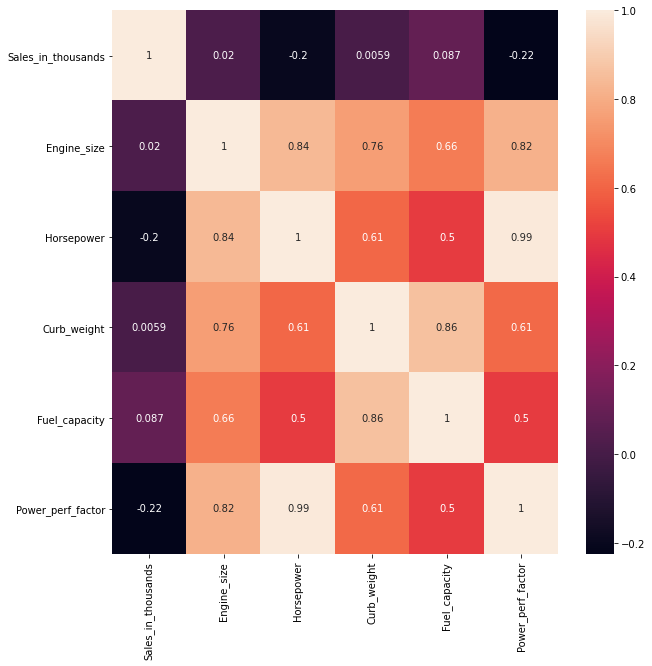

In [270]:
fig = plt.figure(figsize = (10, 10))
g = sns.heatmap(x_data[x_cols].corr(), annot = True)

---
### Step 5. Choose a task formulation for regression. Estimate multivariate correlation (target -predictors).

In [271]:
x_data['y'] = target
print(x_data.corr()['y'][:])

Sales_in_thousands   -0.305189
Engine_size           0.626930
Horsepower            0.839311
Curb_weight           0.528809
Fuel_capacity         0.422882
Power_perf_factor     0.897683
y                     1.000000
Name: y, dtype: float64


<ipython-input-271-74efc8b24f0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['y'] = target


In [272]:
c = x_data.corr()['y'][:].values
x_data.pop('y')

0      21.50
1      28.40
2      30.60
3      42.00
4      23.99
       ...  
151    24.40
152    27.50
153    28.80
154    45.50
155    36.00
Name: y, Length: 156, dtype: float64

In [273]:
c = c[:6]
c

array([-0.30518851,  0.62693027,  0.83931139,  0.52880925,  0.42288208,
        0.89768336])

In [275]:
print(c.T.dot(np.linalg.inv(x_data.corr().values)).dot(c))

0.9998480918571607


---
### Step 6 & 7: 
### Build regression model and make an analysis of multicollinearity and regularization (if needed).
### Analyze the quality of regression model (distribution of residuals, determination coefficient).

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x_data[x_cols], target, test_size = 0.25, random_state = 42)


In [277]:
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [278]:
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.9999944287809441
MSE: 0.0020328847420548217
MAE: 0.0340700600032854


---

In [279]:
ls = Lasso(alpha = 0.1)
ls.fit(x_train, y_train)
y_pred = ls.predict(x_test)

C:\Users\belpa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9625156793434027, tolerance: 1.6737704576991452
  model = cd_fast.enet_coordinate_descent(


In [280]:
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.9998974392773873
MSE: 0.037423430319485786
MAE: 0.15403470811873987


---

In [281]:
lsic = LassoLarsIC(criterion = 'aic')
lsic.fit(x_train, y_train)
y_pred = lsic.predict(x_test)

In [282]:
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.9999438408510639
MSE: 0.02049193827296914
MAE: 0.0976629212537249


---

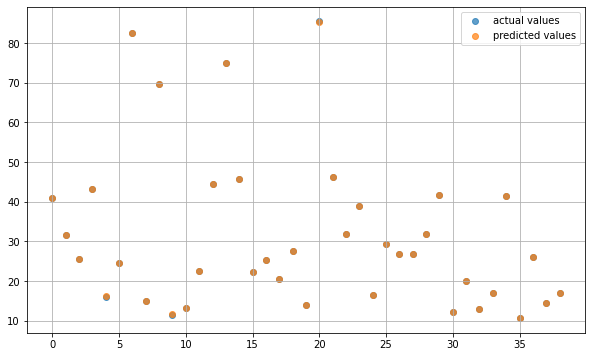

In [300]:
fig = plt.figure(figsize = (10, 6))

plt.scatter(list(range(len(y_test))), y_test, alpha = 0.7)
plt.scatter(list(range(len(y_test))), lr.predict(x_test), alpha = 0.7)
plt.legend(['actual values', 'predicted values'])

plt.grid()

---

In [284]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
x_train_new = poly.fit_transform(x_train)

poly = PolynomialFeatures(3)
x_test_new = poly.fit_transform(x_test)

In [285]:
lrp = LinearRegression(normalize = True)
lrp.fit(x_train_new, y_train)
y_pred = lrp.predict(x_test_new)

In [286]:
print('R2 score: {}'.format(r2_score(y_pred, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.9148598678048955
MSE: 46.62193142017228
MAE: 2.906540064102564


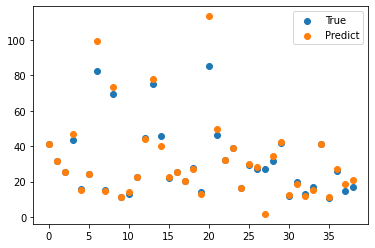

In [287]:
plt.scatter(list(range(len(y_test))), y_test, label = 'True')
plt.scatter(list(range(len(y_test))), lrp.predict(x_test_new), label = 'Predict')
plt.legend()

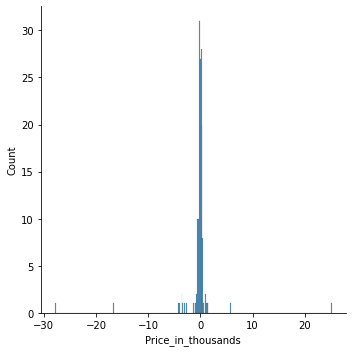

In [289]:
poly = PolynomialFeatures(3)
x_poly = poly.fit_transform(x_data[x_cols])
sns.displot((target - lrp.predict(x_poly)), kde = False)

In [290]:
res = (target - lrp.predict(x_poly))
res

0      0.117188
1     -0.256250
2      1.060938
3      0.367188
4      0.427500
         ...   
151    0.173437
152    0.257812
153    0.260938
154   -0.257812
155   -0.179688
Name: Price_in_thousands, Length: 156, dtype: float64

In [291]:
res.mean()

-0.24512339743589742

In [292]:
res.std()

3.4248634826509226

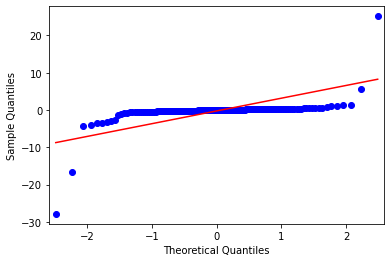

In [293]:
from statsmodels.graphics.gofplots import qqplot

qqplot(res, line = 's')
plt.show()

In [294]:
gfo_params = stats.gamma.fit(res)

In [295]:
ks = stats.kstest(res, 'gamma', gfo_params)
ks

KstestResult(statistic=0.39137203644698626, pvalue=4.883062774751987e-22)

In [296]:
from scipy.stats import shapiro
stat, p = shapiro(res)
print(stat, p)
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks like Gaussian (fail to reject H0)')
else:
    print("Sample doesn't look like Gaussian (reject H0)")
    
# H0&???

0.3058762550354004 4.468430811282046e-24
Sample doesn't look like Gaussian (reject H0)
